In [35]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), '../../../../'))
sys.path.append(work_path)
from helper.regrassion import *
from helper.plot import *
from helper.util import *
from helper.analysis import *
from helper.classification import *
import warnings
warnings.filterwarnings(action='ignore')
import re

In [2]:
categories = ['Survived', 'Pclass', 'Sex', 'Embarked']
origin = my_read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/수업자료/titanic.xlsx', categories=categories)
my_pretty_table(origin.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     1309 non-null   category
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   category
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 87.6+ KB
None

데이터프레임 상위 5개 행
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
|   

In [4]:
df = origin.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## #02. 데이터 전처리

### [1] 나이

탐색적 데이터 분석 과정에서 나이가 생존 여부에 유의미한 차이를 보이는 것으로 판단되었으므로 나이에 대한 결측치를 무조건적인 평균보다 생존자의 평균나이와 사망자의 평균 나이로 나누어서 처리하는 것이 좋을 것이다.

#### (1) 생존자 평균 나이

In [5]:
mean_age_df = df[['Survived', 'Age']].groupby('Survived').mean()
mean_age_df

,Age
Survived,
0,30.510986
1,28.931079


#### (2) 사망자 평균 나이

In [8]:
for i in mean_age_df.index:
    mean_age = round(mean_age_df.loc[i]['Age'],0)
    #print(mean_age)

    expr = (df['Survived'] == i) & (df['Age'].isna())
    df.loc[expr, 'Age'] = df.loc[expr, 'Age'].fillna(mean_age)

df['Age'].isna().sum()

0

#### (3) 결측치 정제 후 데이터 분포 확인

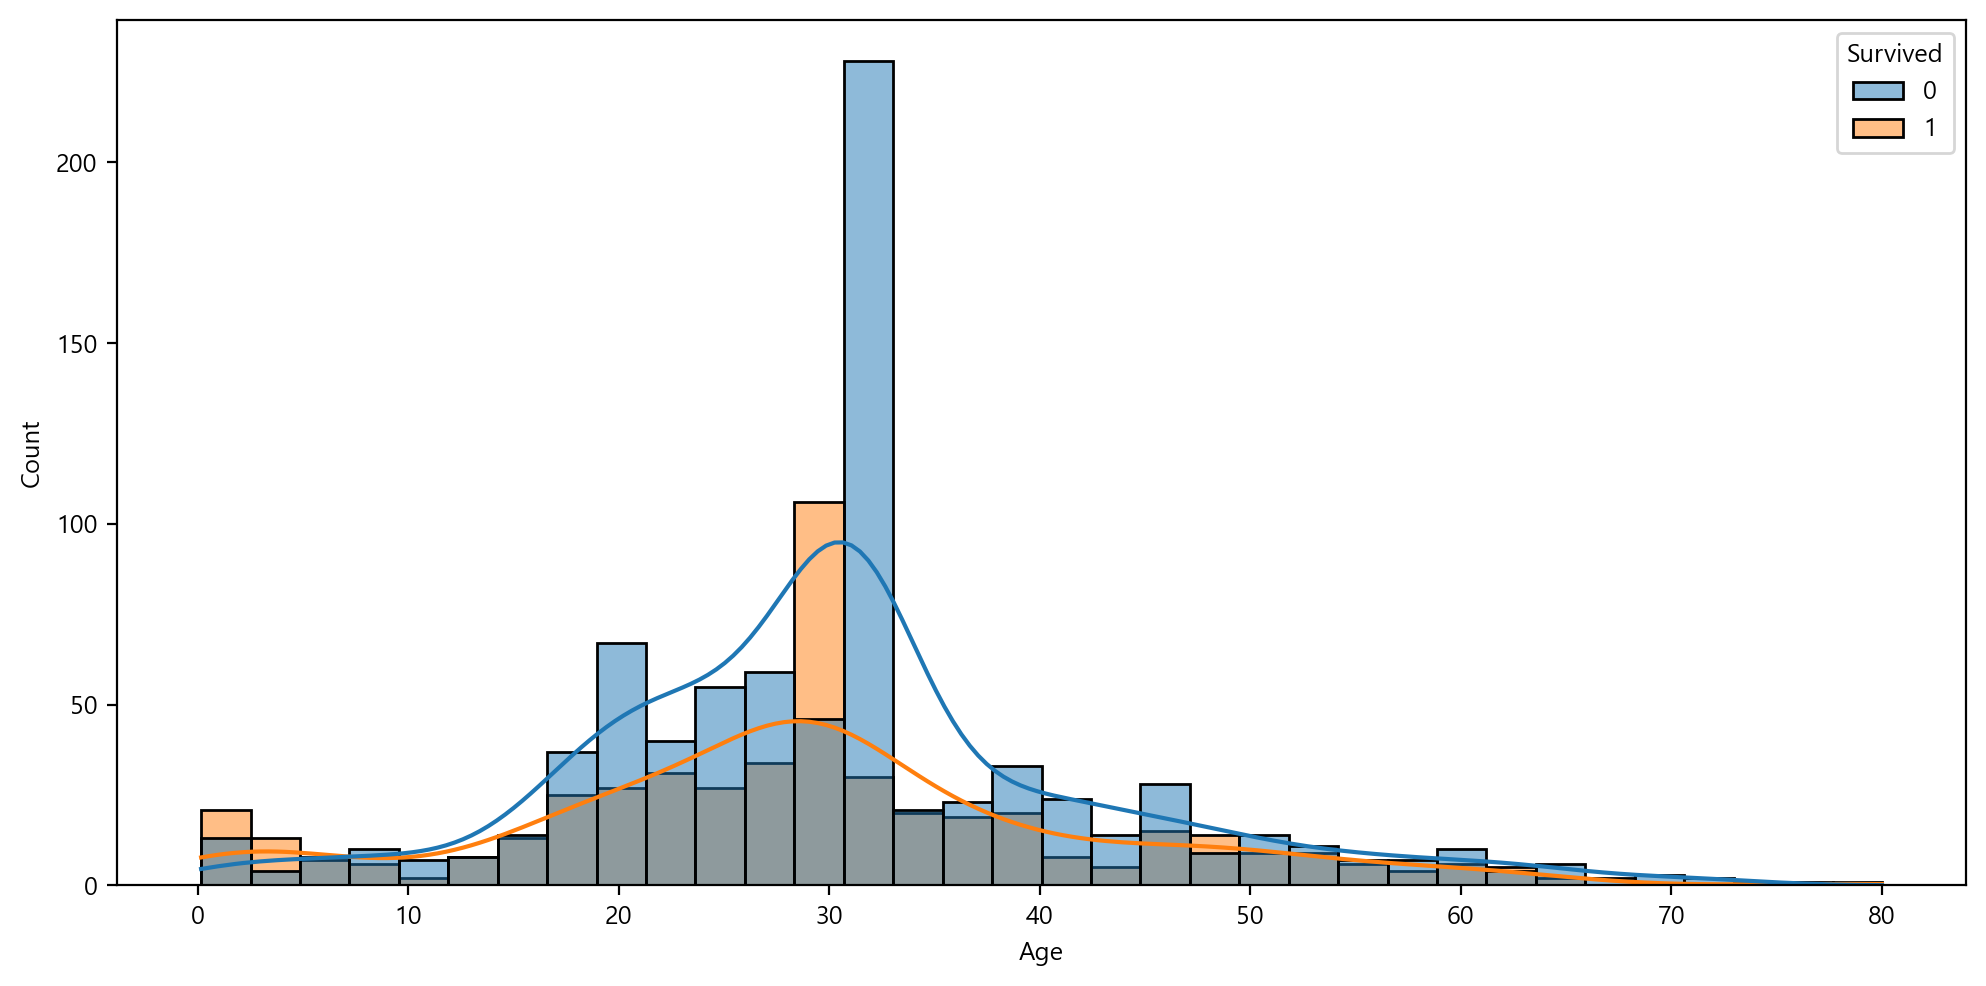

In [9]:
my_histplot(df, 'Age', hue='Survived', dpi=200)

#### (4) 나이의 구간 수를 변경

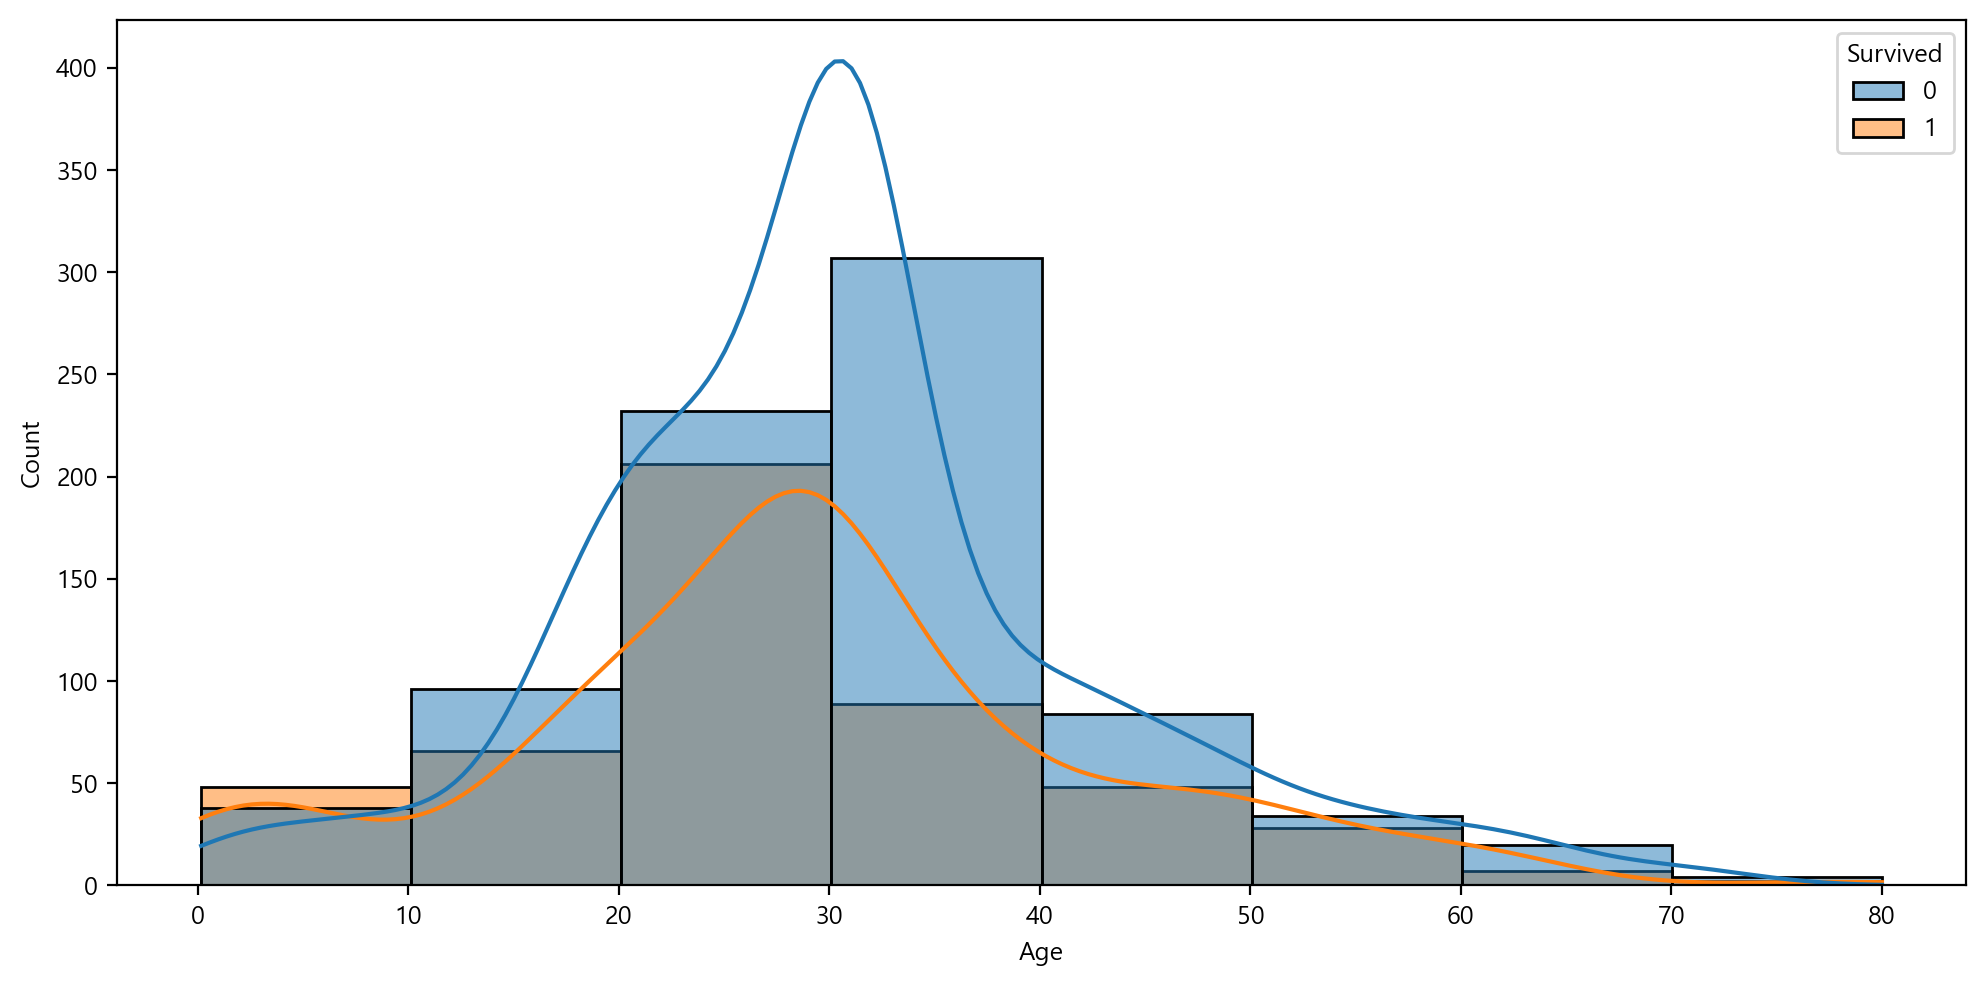

In [10]:
my_histplot(df, 'Age', hue='Survived', bins=8, dpi=200)

#### (5) 나이의 구간에 따른 기준 값 구하기

In [12]:
hist, bins = np.histogram(df['Age'], bins=5)
print(hist)
print(np.round(bins, 0))

[134 787 269 106  13]
[ 0. 16. 32. 48. 64. 80.]


> 16세 이하, 17~32세, 33~48세, 49~64세, 64세 초과 구간으로 나누어 라벨링을 수행

In [ ]:
df2 = df.copy()
df2.loc[df2['Age'] <= 16, 'Age'] = 0
df2.loc[(df2['Age'] > 16) & (df2['Age'] <= 32), 'Age'] = 1
df2.loc[(df2['Age'] > 32) & (df2['Age'] <= 48), 'Age'] = 2
df2.loc[(df2['Age'] > 48) & (df2['Age'] <= 64), 'Age'] = 3
df2.loc[df2['Age'] > 64, 'Age'] = 4

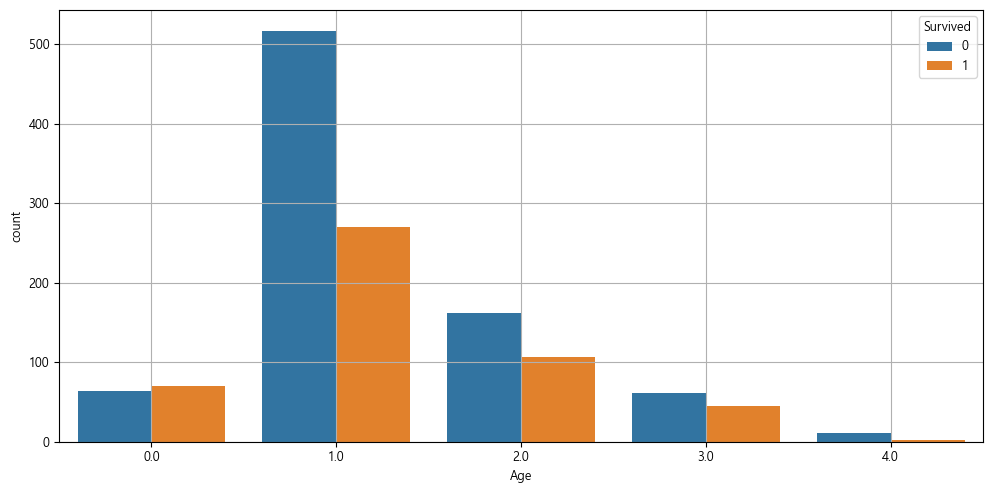

In [15]:
my_countplot(df2, xname='Age', hue='Survived')

### [2] 객실 유무

앞 분석에서는 객실번호 데이터를 제외하고 분석모형을 생성했으나 단순히 객실의 유무만로 명목형 변수를 생성하여 분석에 포함함

#### (1) 명목형 변수 생성

In [16]:
df2['Has_Cabin'] = df2['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
df2['Has_Cabin'].value_counts()

0    1014
1     295
Name: Has_Cabin, dtype: int64

#### (2) 객실 유무에 따른 생존 비율 비교

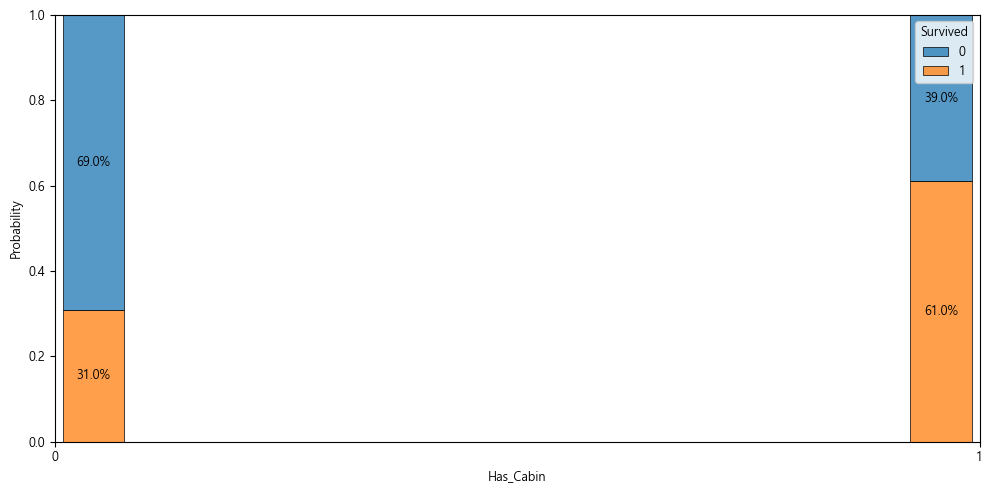

In [19]:
my_stackplot(df2, xname='Has_Cabin', hue='Survived', dpi=100)

### [3] 가족 구성원 수

형제자매/배우자 + 부모/자녀 + 본인

In [20]:
df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1

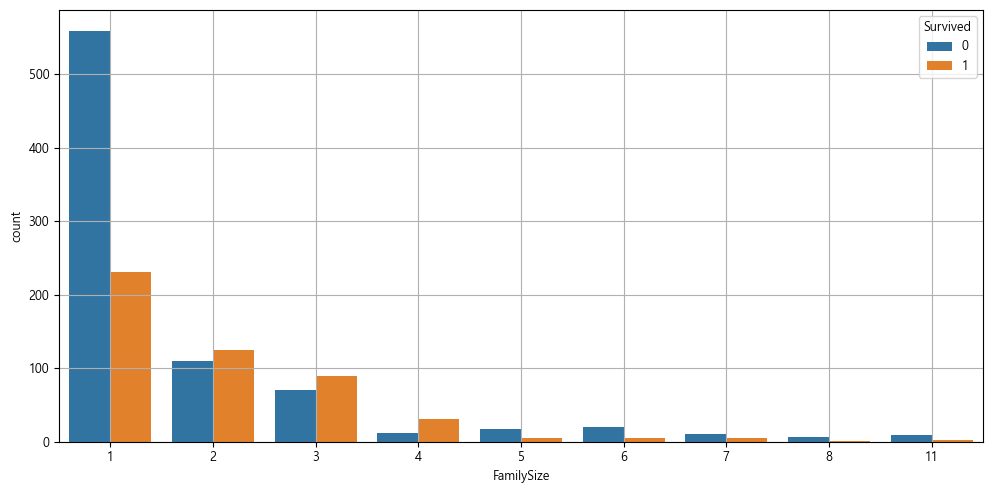

In [21]:
my_countplot(df2, 'FamilySize', hue='Survived')

### [4] 혼자 탑승했는지 여부

In [22]:
df2['IsAlone'] = 0
df2.loc[df2['FamilySize'] == 1, 'IsAlone'] = 1

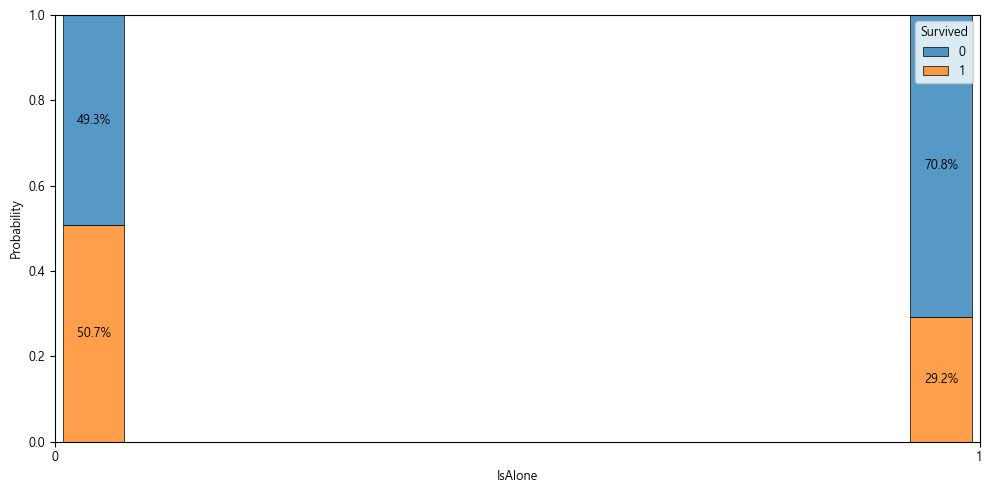

In [24]:
my_stackplot(df2, 'IsAlone', hue='Survived')

### [5] 탑승지 데이터의 결측치 처리

#### (1) 생존, 사망 여부에 따른 최빈값 구하기

In [25]:
most_embarked_df = df2[['Survived', 'Embarked']].groupby('Survived').agg(Series.mode)
most_embarked_df

,Embarked
Survived,
0,S
1,S


#### (2) 탑승지 결측치에 대한 종속변수를 확인하고 적절한 값으로 대체

In [28]:
for i in most_embarked_df.index:
    most = most_embarked_df.loc[i]['Embarked']
    #print(most)

    expr = (df2['Survived'] == i) & (df2['Embarked'].isna())
    #print(expr)

    df2.loc[expr, 'Embarked'] = df2.loc[expr, 'Embarked'].fillna(most)

df2['Embarked'].isna().sum()

0

### [6] 운임요금에 대한 결측치 처리

#### (1) 결측치 확인

In [29]:
df2['Fare'].isna().sum()

1

#### (2) 생존, 사망 여부에 따라 평균값 구함

In [30]:
mean_fare_df = df2[['Survived', 'Fare']].groupby('Survived').mean()
mean_fare_df

,Fare
Survived,
0,23.879124
1,48.811497


#### (3) 생존 여부에 따른 평균 요금 대체

In [34]:
for i in mean_fare_df.index:
    mean_fare = mean_fare_df.loc[i]['Fare']
    #print(mean_fare)

    expr = (df2['Survived'] == i) & (df2['Fare'].isna())
    #print(expr)

    df2.loc[expr, 'Fare'] = df2.loc[expr, 'Fare'].fillna(mean_fare)

df2['Fare'].isna().sum()

0

### [7] 이름에 대한 처리

#### (1) 정규표현식 처리 함수

이름에서 알파벳을 제외한 나머지 글자를 제외하고 어절단위로 리스트로 묶은 후 인덱스가 1인 위치를 리턴하는 함수

> 예) Mr. Lee --> ['Mr', 'Lee']

In [37]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)

    if title_search:
        return title_search.group(1)
    
    return ""

#### (2) 이름 앞에 붙은 호칭을 분리

In [38]:
df2['Title'] = df2['Name'].apply(get_title)
df2['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

#### (3) 희귀 호칭은 `기타등등`으로 분류함

In [39]:
df2['Title'] = df2['Title'].replace(['Rev', 'Dr', 
                'Mlle', 'Major', 'Col', 'Countess', 'Capt', 'Ms', 
                'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer', 'Dona'], 'Rare')
df2['Title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Rare       34
Name: Title, dtype: int64

### [8] 라벨링

In [40]:
df3 = my_labelling(df2, 'Title', 'Embarked', 'Sex')
my_pretty_table(df3.head())

+----+---------------+------------+----------+-----------------------------------------------------+-------+-------+---------+---------+------------------+---------+---------+------------+-------------+--------------+-----------+---------+
|    |   PassengerId |   Survived |   Pclass | Name                                                |   Sex |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin   |   Embarked |   Has_Cabin |   FamilySize |   IsAlone |   Title |
|----+---------------+------------+----------+-----------------------------------------------------+-------+-------+---------+---------+------------------+---------+---------+------------+-------------+--------------+-----------+---------|
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             |     1 |     1 |       1 |       0 | A/5 21171        |    7.25 | nan     |          2 |           0 |            2 |         0 |       2 |
|  1 |             2 |          1 |     

### [9] 운임요금에 대한 처리

#### (1) 사분위수 확인

In [41]:
my_outlier_table(df3, 'Fare')

,Q1,Q2,Q3,IQR,UP,DOWN
FIELD,,,,,,
Fare,7.8958,14.4542,31.275,23.3792,66.3438,-27.173


#### (2) 사분위수 구간에 따라 라벨링

In [42]:
df3.loc[df3['Fare'] <= 7.9, 'Fare'] = 0
df3.loc[(df3['Fare'] > 7.9) & (df3['Fare'] <= 14.5), 'Fare'] = 1
df3.loc[(df3['Fare'] > 14.5) & (df3['Fare'] <= 31.3), 'Fare'] = 2
df3.loc[df3['Fare'] > 31.3, 'Fare'] = 3


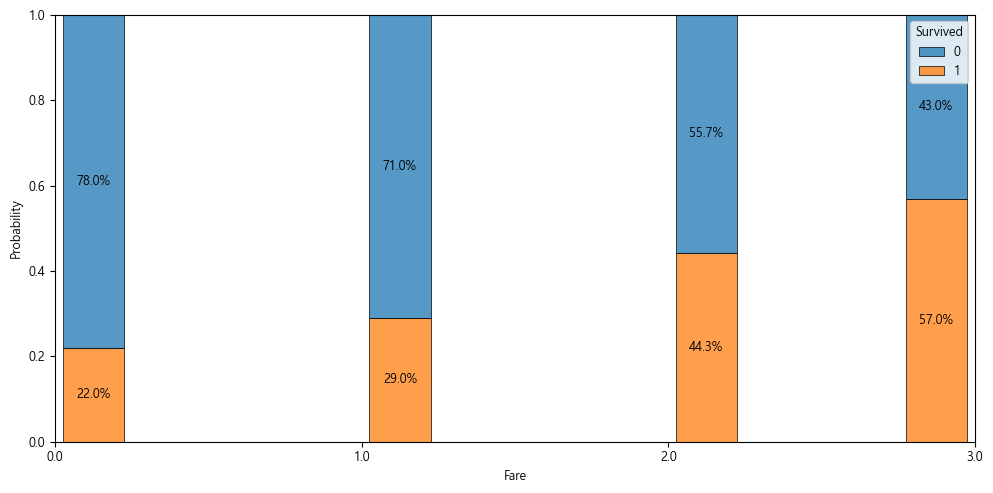

In [43]:
my_stackplot(df3, xname='Fare',hue='Survived')

### [10] 불필요한 컬럼 제거

In [45]:
drop_elements = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
df4 = df3.drop(drop_elements,axis=1).set_index('PassengerId')
my_pretty_table(df4.head())

+---------------+------------+----------+-------+-------+--------+------------+-------------+--------------+-----------+---------+
|   PassengerId |   Survived |   Pclass |   Sex |   Age |   Fare |   Embarked |   Has_Cabin |   FamilySize |   IsAlone |   Title |
|---------------+------------+----------+-------+-------+--------+------------+-------------+--------------+-----------+---------|
|             1 |          0 |        3 |     1 |     1 |      0 |          2 |           0 |            2 |         0 |       2 |
|             2 |          1 |        1 |     0 |     2 |      3 |          0 |           1 |            2 |         0 |       3 |
|             3 |          1 |        3 |     0 |     1 |      1 |          2 |           0 |            1 |         1 |       1 |
|             4 |          1 |        1 |     0 |     2 |      3 |          2 |           1 |            2 |         0 |       3 |
|             5 |          0 |        3 |     1 |     2 |      1 |          2 |    

### [11] 훈련/검증 데이터 분리

In [46]:
df4['Survived'] = df4['Survived'].astype('int')
x_train, x_test, y_train, y_test = my_train_test_split(df4, yname='Survived')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1047, 9), (1047,), (262, 9), (262,))

## #03. 로지스틱 회귀 분석

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 10 |     1 | l2        |          0.852896 |
| 13 |    10 | l2        |          0.852896 |
| 16 |   100 | l2        |          0.852896 |
|  7 |   0.1 | l2        |           0.84812 |
|  4 |  0.01 | l2        |          0.780314 |
|  1 | 0.001 | l2        |           0.62273 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.440417 |     0.479668 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.853868 |     0.866412 | 예측 결과(TN,FP,TP,TN)가 실제 결과

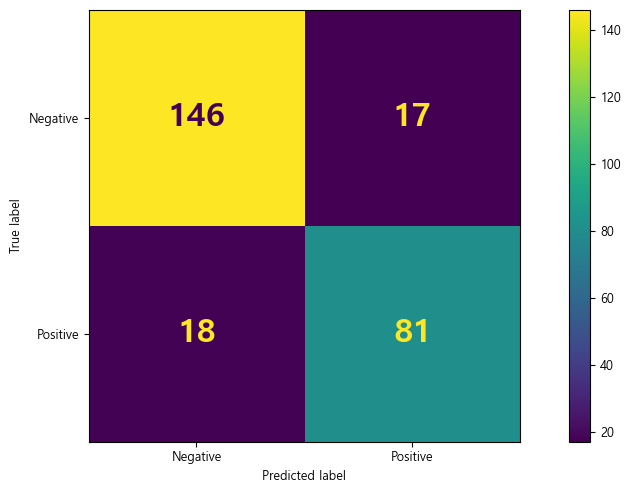


[ROC/PR Curve]


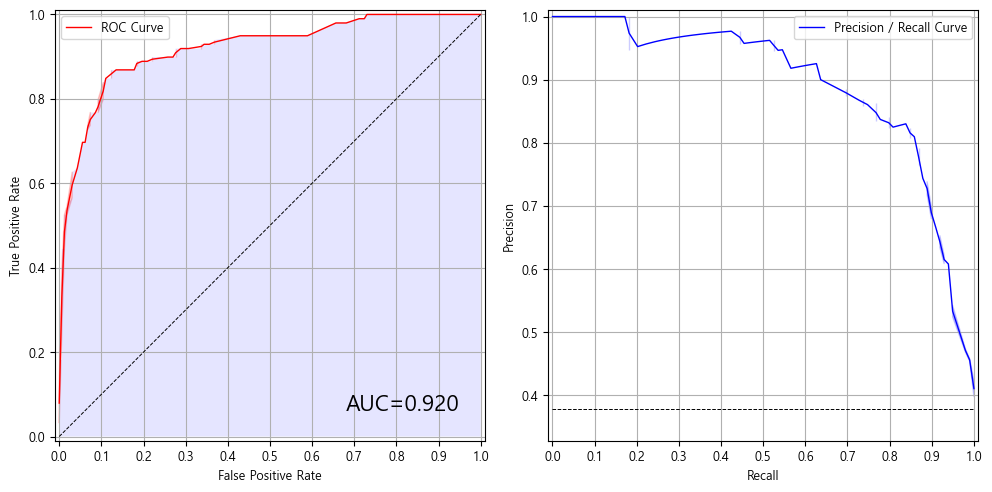


[학습곡선]


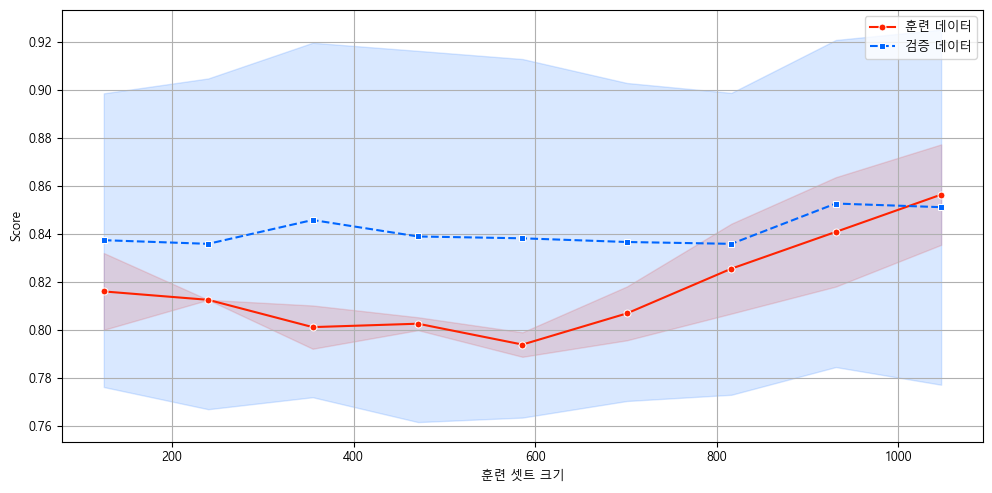

+----+------------+------------+--------------------+------------+---------+------------+------------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |   OddsRate |
|----+------------+------------+--------------------+------------+---------+------------+------------|
|  0 | Survived   | Pclass     |            -0.4416 |      0.399 | -1.1058 |      0.269 |      0.643 |
|  1 | Survived   | Sex        |            -3.5132 |      0.397 | -8.8545 |          0 |     0.0298 |
|  2 | Survived   | Age        |            -0.3014 |      0.278 |  -1.084 |      0.278 |     0.7398 |
|  3 | Survived   | Fare       |              0.314 |      0.295 |  1.0652 |      0.287 |     1.3689 |
|  4 | Survived   | Embarked   |            -0.0949 |      0.236 | -0.4023 |      0.687 |     0.9095 |
|  5 | Survived   | Has_Cabin  |             0.4964 |       0.58 |  0.8562 |      0.392 |     1.6427 |
|  6 | Survived   | FamilySize |            -0.3197 |      0.189 | -1.6942 |       0.09 |     0

In [47]:

estimator = my_logistic_classification(x_train, y_train, x_test, y_test)